In [1]:
import numpy as np
import sklearn.tree as st

In [2]:
import pandas as pd

X_train = pd.read_csv('../../data/adaboost_train.csv', usecols=range(2,12))
y_train = pd.read_csv('../../data/adaboost_train.csv', usecols=[1])

X_test = pd.read_csv('../../data/adaboost_test.csv', usecols=range(2,12))
y_test = pd.read_csv('../../data/adaboost_test.csv', usecols=[1])



In [3]:
def adaBoost(X, y, T):
    
    m = len(X)
    f = list()
    a = list()
    e = list()
    dtc_gen = st.DecisionTreeClassifier()
    
    D = [1/m] * m
    for t in range(0, T):
        
        # Training classifier
        f_t = dtc_gen.fit(X_train, y_train, sample_weight = D)
        f.append(f_t)
        
        # Determine indices of wrong predictions
        wrong_indices = []
        predictions = f_t.predict(X)
        targets = np.array(y).flatten()
        for i in range(0, m):
            if predictions[i] != targets[i]:
                wrong_indices.append(i)
        
        # Calculating error
        e_t = sum([D[i] for i in wrong_indices]) + 10**(-300)
        e.append(e_t)
        
        # Determining, 'how much say' the classifier has in the final vote
        a_t = 1/2 * np.log((1 - e_t) / e_t)
        a.append(a_t)
        
        # Updating weight distribution
        D = [D[i] * np.exp(-a_t * targets[i] * predictions[i]) for i in range(0,m)]
        z_t = sum(D)
        D = [w/z_t for w in D]
        
    def votedClassifier(X):
        
        predictions = [f[i].predict(X) for i in range(0,T)]
        predictions = np.array(predictions).transpose()
        
        classes = [np.sign(sum([a[t] * predictions[i][t] for t in range(0, T)])) for i in range(0, len(X))]
        
        return classes
        
    return votedClassifier
    

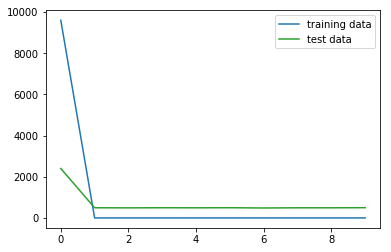

In [5]:
import matplotlib.pyplot as plt

maxT = 10

classifier = [adaBoost(X_train, y_train, T) for T in range (0,maxT)]

x_axis_vals = range(0, maxT)
y_axis_vals_train = [list(classifier[i](X_train) == np.array(y_train).flatten()).count(False) for i in x_axis_vals]
y_axis_vals_test = [list(classifier[i](X_test) == np.array(y_test).flatten()).count(False) for i in x_axis_vals]


train = plt.plot(x_axis_vals, y_axis_vals_train, color = "C0", label = "training data")
train = plt.plot(x_axis_vals, y_axis_vals_test, color = "C2", label = "test data")

plt.legend()
plt.show()